
# Unsupervised Learning: Clustering & Dimensionality Reduction on the Wine Dataset

This notebook fulfills the assignment requirements for unsupervised learning:
- Data preprocessing (missing values, scaling, encoding if needed)
- Clustering with at least two algorithms (K-Means, Hierarchical)
- Model selection (Elbow, Silhouette)
- Dimensionality reduction (PCA and t-SNE) and visualization
- Evaluation and interpretation
- Deployment & monitoring discussion


## Environment & Imports

In [1]:

# !pip install scikit-learn matplotlib pandas numpy scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['figure.dpi'] = 120


## 1) Dataset Selection & Loading

In [2]:

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = pd.Series(wine.target, name='true_label')  # Not used for training, just for reference

display(X.head())
print("\nShape:", X.shape)
print("Columns:", list(X.columns))


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Shape: (178, 13)
Columns: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## 2) Preprocessing

In [3]:

# Check for missing values
missing = X.isna().sum()
display(missing)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 3) Quick EDA

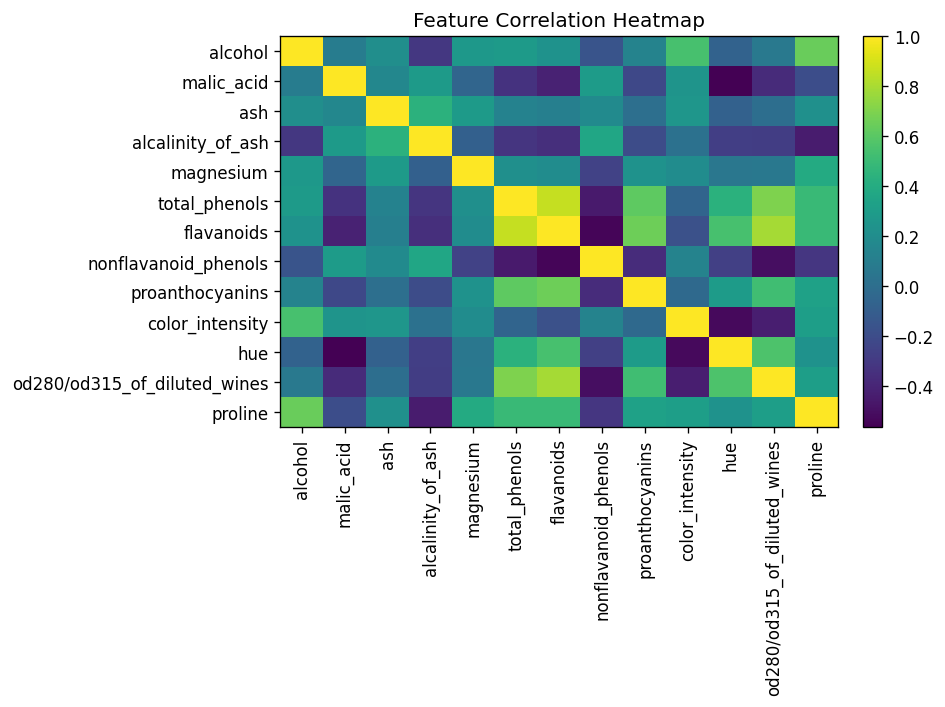

In [4]:

corr = X.corr()
fig, ax = plt.subplots()
im = ax.imshow(corr.values, aspect='auto')
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)
ax.set_title('Feature Correlation Heatmap')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


## 4) Clustering – K-Means

Best k by silhouette (KMeans): 3


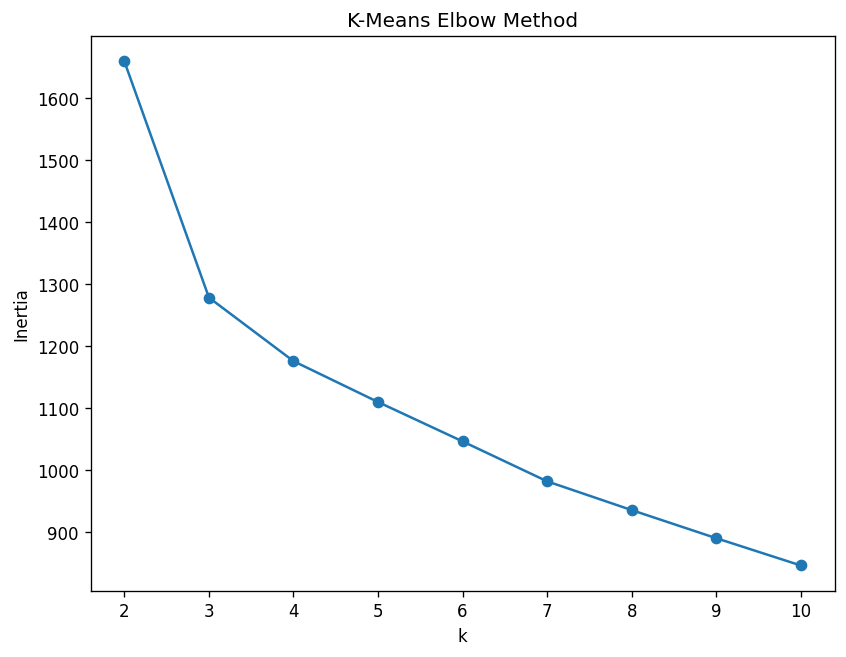

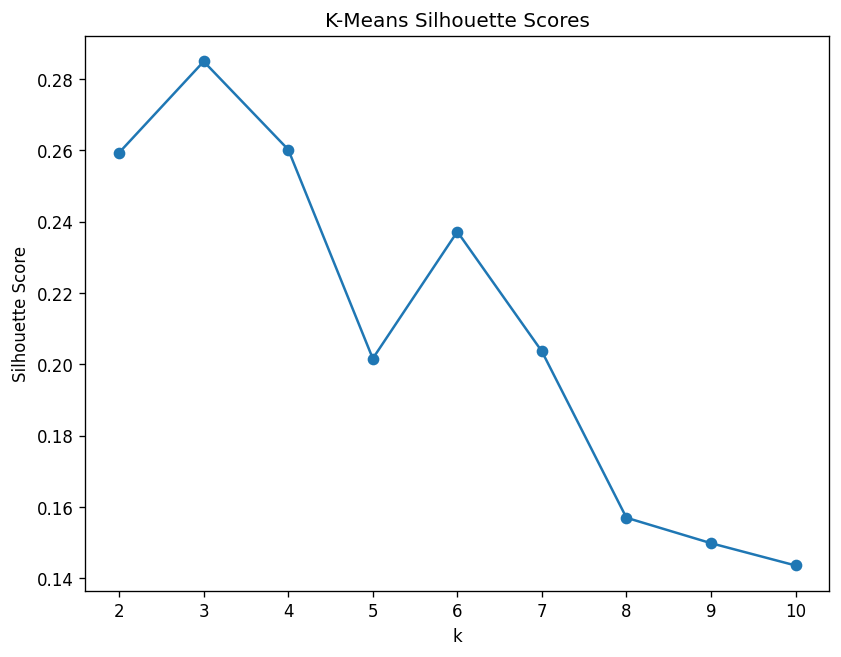

KMeans silhouette: 0.2848589191898987


In [5]:

inertias = []
sils = []
ks = list(range(2, 11))
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    labels = km.labels_
    sil = silhouette_score(X_scaled, labels)
    sils.append(sil)

best_k_kmeans = ks[int(np.argmax(sils))]
print("Best k by silhouette (KMeans):", best_k_kmeans)

fig = plt.figure()
plt.plot(ks, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Method')
plt.show()

fig = plt.figure()
plt.plot(ks, sils, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('K-Means Silhouette Scores')
plt.show()

# Fit final KMeans with best k
kmeans_final = KMeans(n_clusters=best_k_kmeans, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)
kmeans_labels = kmeans_final.labels_
print("KMeans silhouette:", silhouette_score(X_scaled, kmeans_labels))


## 5) Clustering – Agglomerative (Hierarchical)

Best k by silhouette (Agglomerative): 3


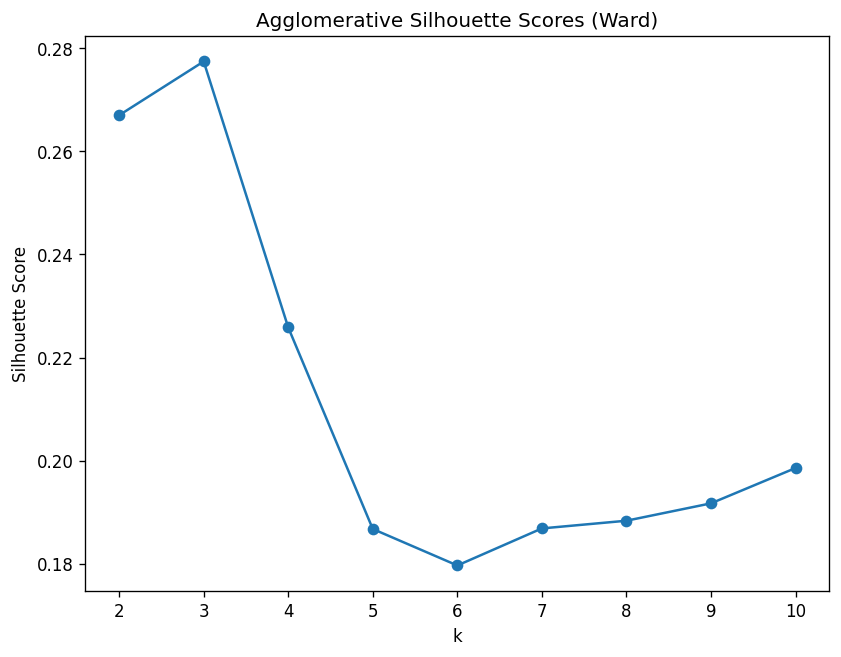

Agglomerative silhouette: 0.2774439826952266


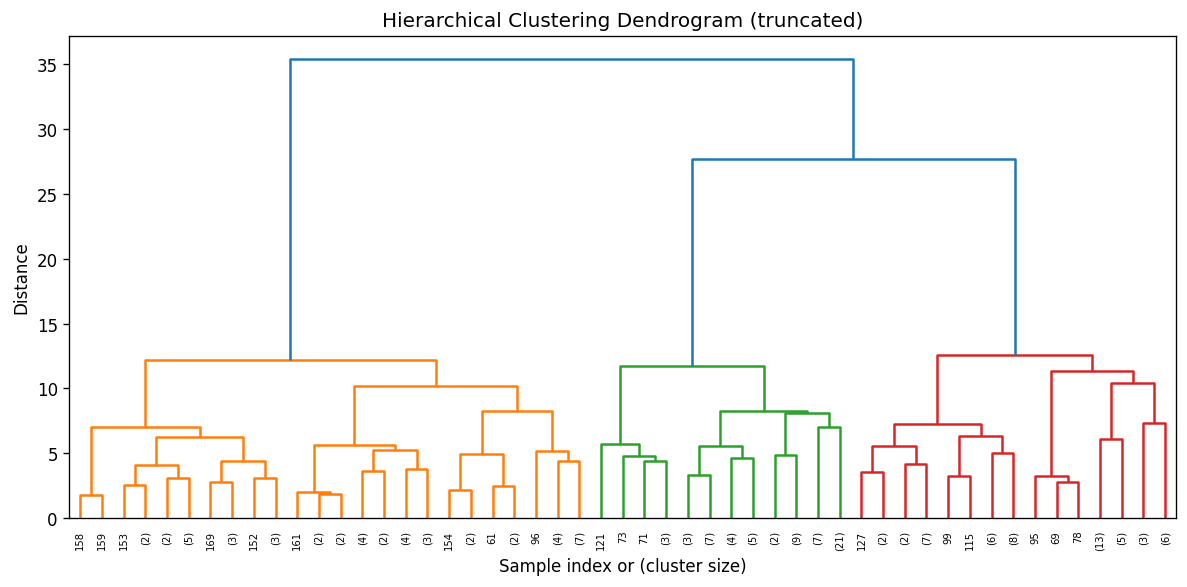

In [6]:

sils_h = []
for k in ks:
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(X_scaled)
    sils_h.append(silhouette_score(X_scaled, labels))

best_k_agg = ks[int(np.argmax(sils_h))]
print("Best k by silhouette (Agglomerative):", best_k_agg)

fig = plt.figure()
plt.plot(ks, sils_h, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Agglomerative Silhouette Scores (Ward)')
plt.show()

# Final Agglomerative
agg_final = AgglomerativeClustering(n_clusters=best_k_agg, linkage='ward')
agg_labels = agg_final.fit_predict(X_scaled)
print("Agglomerative silhouette:", silhouette_score(X_scaled, agg_labels))

# Dendrogram (using scipy.linkage)
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


## 6) Dimensionality Reduction – PCA

Explained variance ratio: [0.36198848 0.1920749 ]  (sum = 0.5540633835693526 )


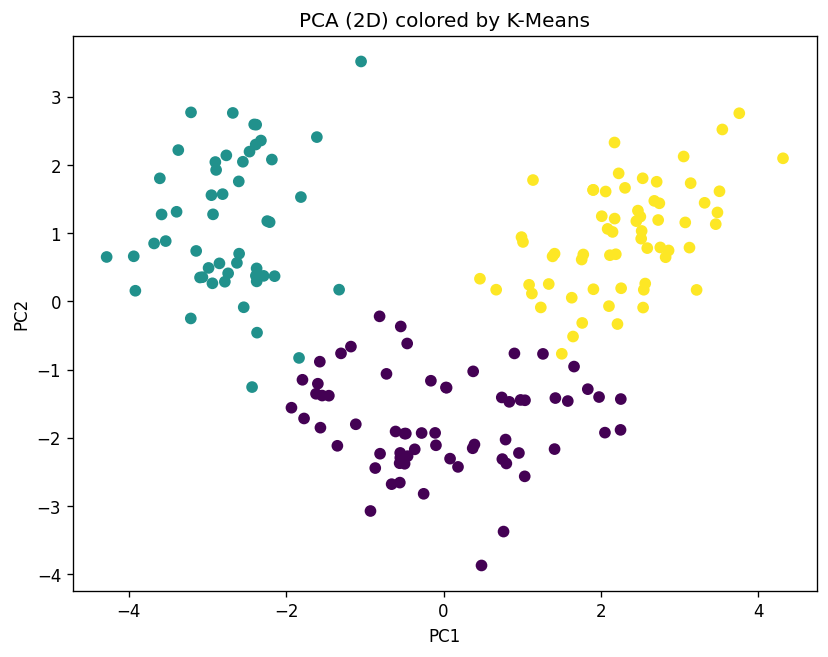

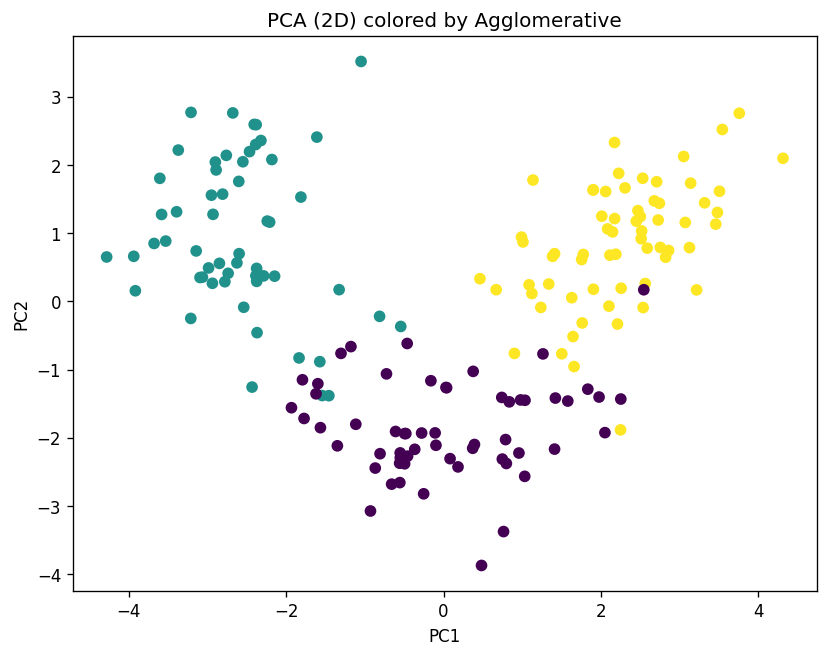

In [7]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_, " (sum =", pca.explained_variance_ratio_.sum(), ")")

# Plot PCA with KMeans labels
fig = plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title('PCA (2D) colored by K-Means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Plot PCA with Agglomerative labels
fig = plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=agg_labels)
plt.title('PCA (2D) colored by Agglomerative')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


## 7) Dimensionality Reduction – t-SNE

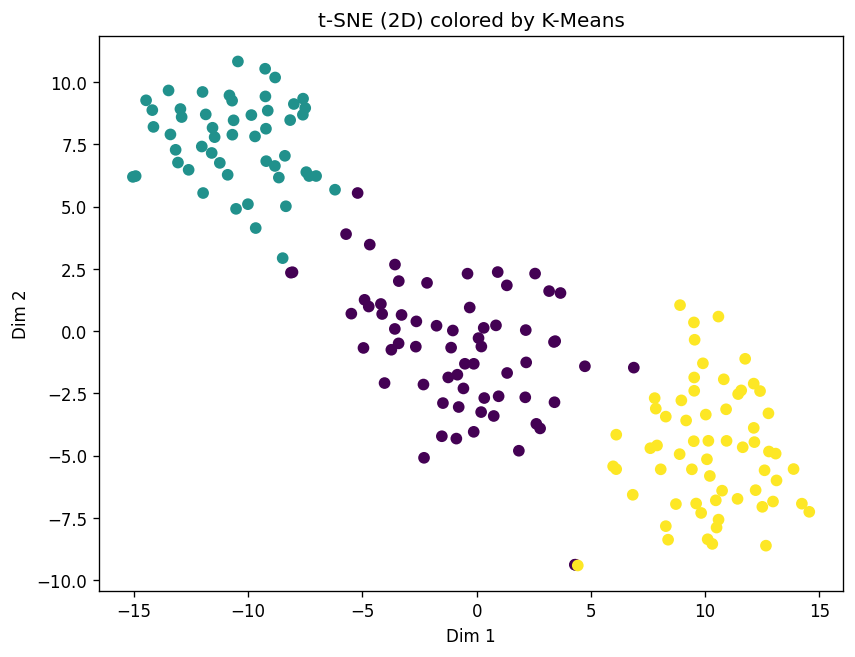

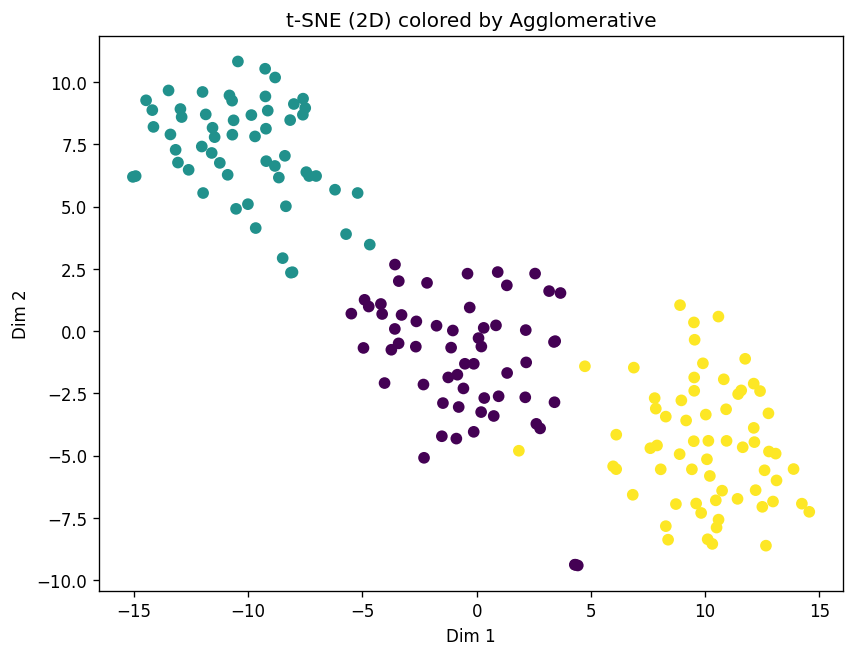

In [8]:

tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

fig = plt.figure()
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans_labels)
plt.title('t-SNE (2D) colored by K-Means')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

fig = plt.figure()
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=agg_labels)
plt.title('t-SNE (2D) colored by Agglomerative')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()


## 8) Interpretation

In [9]:

# Helper: cluster means in original feature scale
def cluster_profile_means(X_original: pd.DataFrame, labels):
    df = X_original.copy()
    df['cluster'] = labels
    return df.groupby('cluster').mean().sort_index()

kmeans_profile = cluster_profile_means(pd.DataFrame(scaler.inverse_transform(X_scaled), columns=X.columns), kmeans_labels)
agg_profile = cluster_profile_means(pd.DataFrame(scaler.inverse_transform(X_scaled), columns=X.columns), agg_labels)

print("KMeans cluster means (original scale):")
display(kmeans_profile)

print("Agglomerative cluster means (original scale):")
display(agg_profile)


KMeans cluster means (original scale):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806


Agglomerative cluster means (original scale):


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875


## 9) Evaluation Summary

In [10]:

print(f"Best k (KMeans) by Silhouette: {best_k_kmeans}")
print(f"KMeans Silhouette: {silhouette_score(X_scaled, kmeans_labels):.4f}")

print(f"Best k (Agglomerative) by Silhouette: {best_k_agg}")
print(f"Agglomerative Silhouette: {silhouette_score(X_scaled, agg_labels):.4f}")


Best k (KMeans) by Silhouette: 3
KMeans Silhouette: 0.2849
Best k (Agglomerative) by Silhouette: 3
Agglomerative Silhouette: 0.2774


## 10) Deployment & Monitoring (Discussion)


**Scenario:** Daily batches of new wine-chemistry data are clustered to guide QA and style decisions.

- **Latency:** Pre-fit scaler/model; batch-score.
- **Scalability:** FastAPI + autoscaling; MiniBatchKMeans for scale.
- **Data Drift:** Monitor feature drift (KS/PSI) and Silhouette over time; alerts.
- **Model Staleness:** Monthly/quarterly retrains; version with MLflow/DVC.
- **Observability:** Log inputs, predictions, metrics; Grafana dashboards.
- **Governance:** Model card, lineage, RBAC/PII controls.
